In [2]:
import pymssql
import pymysql
import time
import datetime
from datetime import datetime as dt
import numpy as np
from tqdm import *
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
def get_conn_mysql():
    conn = pymysql.connect(host='localhost', port=3306, user='root', passwd='admin', db='coalmine', charset='utf8')
    return conn

In [10]:
conn = get_conn_mysql()
sids = ['049D08']
sids = "('" + "','".join(sids)+ "')"
sql = " select SensorID,Time, MonitorValue from monitor_gas_data_049d08 where SensorID in %s  and  Time between '2017-04-01' and '2018-05-01' order by Time" % sids
sql

" select SensorID,Time, MonitorValue from monitor_gas_data_049d08 where SensorID in ('049D08')  and  Time between '2017-04-01' and '2018-05-01' order by Time"

In [11]:
cursor = conn.cursor()
res = cursor.execute(sql)

In [12]:
rows = cursor.fetchall()

In [13]:
senids = []
dates = []
values = []
for item in rows:
    senids.append(item[0])
    dates.append(item[1])
    values.append(item[2])
df = pd.DataFrame({'SensorID':senids, 'Time':dates, 'MonitorValue':values})

In [19]:
df.to_pickle('./data/044A02.pickle')

In [3]:
df = pd.read_pickle('./data/044A02.pickle')

In [14]:
df.index.size

1332468

In [18]:
df1 = df.shift(1)
df1['raw'] = df['MonitorValue']
df1['diff'] = df1['raw'] - df1['MonitorValue']
df1[df1['diff']> 0 ].index.size
df1[df1['diff']> 0 ].index.size / df1.index.size

3.001948264423611e-06

37251

0.0810341639565364

(array([  2.06419000e+06,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   8.12700000e+03,
          5.89000000e+02]),
 array([   0.   ,   62.875,  125.75 ,  188.625,  251.5  ,  314.375,
         377.25 ,  440.125,  503.   ,  565.875,  628.75 ]),
 <a list of 10 Patch objects>)

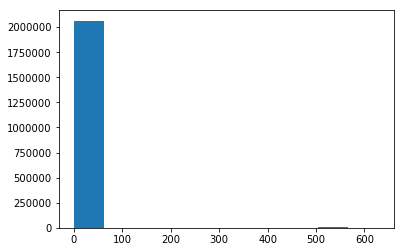

In [23]:
raw = df1['raw']
plt.hist(raw,bins=10)

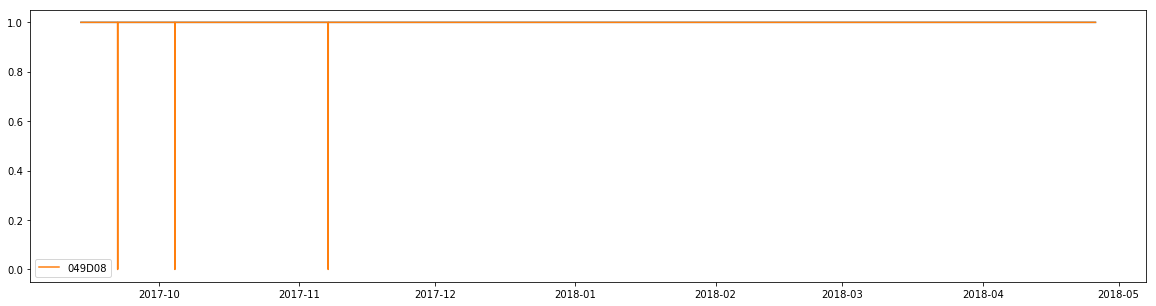

In [19]:
# df1[df1['Time']<'2017-12-01 01:00:00'].index.size
def plot_one(df, sid, path=None):
    temp = df[df['SensorID']== sid]
    time = temp['Time']
    val = temp['raw']
    val = val.rolling(6).max()
    plt.figure(figsize=(20, 5))
    plt.plot(time, np.asarray([1]*len(time)))
    plt.plot(time, val, label=sid)
    plt.legend()
    if path is None:
        plt.show()
    else:
        plt.savefig(path)
# 
sids = ['049D08']

temp = df1[(df1['Time']>'2017-07-01 00:00:00') & (df1['Time']<'2018-05-01 00:00:00')]
# temp = df1[(df1['Time']>'2017-09-17 12:00:00') & (df1['Time']<'2017-09-17 13:00:00')]
# temp = df1[(df1['Time']>'2017-12-01 10:00:00')]
# temp = temp[temp['raw']<0.1]
# temp = df1
for sid in sids:
    plot_one(temp, sid)


In [1]:
def plot_month(df):
    start_date = pd.Timestamp('2017-04-01 00:00:00')
    end_date = pd.Timestamp('2018-05-01 00:00:00')
    cur_start = start_date
    while cur_start < end_date:
        cur_end = cur_start + pd.Timedelta(days=1)
        print(cur_start, cur_end)
        temp = df[(df['Time']>cur_start) & (df['Time']<=cur_end)]
        print(temp.index.size)
        sid = '044A02'
        path = './temp_file/%s_%s.png' % (sid, pd.to_datetime(cur_start).strftime("%Y-%m-%d-%H_%M_%S"))
        plot_one(temp, sid, None)
        cur_start = cur_end
#         break
# plot_one(temp, sid)
plot_month(df1)


NameError: name 'df1' is not defined